## 갭마인더 데이터 집합 불러오기

In [5]:
import pandas as pd

df = pd.read_csv('../data/gapminder.tsv', sep='\t')

## 불러온 데이터 집합(데이터 프레임) 살펴보기

In [15]:
# 첫 행부터 5개 출력
print(df.head())
# 맨 뒤 행부터 5개 출력
print(df.tail())
# 타입 출력
print(type(df))
# 행의 수와 열의 수
print(df.shape)
# 열 목록 출력
print(df.columns)
# 각 열의 데이터 타입 출력
print(df.dtypes)
# 데이터 프레임의 전체 내용 출력
print(df.info())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
<class 'pandas.core.frame.DataFrame'>
(1704, 6)
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    flo

## 열 단위로 데이터 추출하기

In [16]:
# 인덱싱을 통하여 열 단위로 추출이 가능하고 하나의 열 타입은 시리즈가 됨
country_df = df['country']
print(type(country_df))

# 인덱싱을 통하여 여러 열을 추출이 가능함 여러 열 추출한 값이 타입은 데이터프레임이다.
subset = df[['country', 'continent', 'year']]
print(type(subset))
print(subset)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
          country continent  year
0     Afghanistan      Asia  1952
1     Afghanistan      Asia  1957
2     Afghanistan      Asia  1962
3     Afghanistan      Asia  1967
4     Afghanistan      Asia  1972
...           ...       ...   ...
1699     Zimbabwe    Africa  1987
1700     Zimbabwe    Africa  1992
1701     Zimbabwe    Africa  1997
1702     Zimbabwe    Africa  2002
1703     Zimbabwe    Africa  2007

[1704 rows x 3 columns]


## loc 속성으로 행 단위 데이터 추출하기

In [19]:
# 인덱스의 라벨이 0인 행 추출, 인덱스의 라벨을 이용하는 것이므로 loc[-1]은 없을 수 있다.
print(df.loc[0])
# 하나의 행도 시리즈가 된다.
print(type(df.loc[0]))

# 마지막 행 추출
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


## tail과 loc는 조금 달라요!

In [23]:
# 맨 뒤에 행부터 하나의 행 추출
print(df.tail(n=1))


# loc을 이용하여 3개의 인덱스 값에 해당하는 행 추출
print(df.loc[[0, 99]])


# 하나의 행을 추출 했을 때 tail 과 loc의 추출된 데이터의 타입이 다르다.
print(type(df.tail(n=1)))
print(type(df.loc[0]))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
<class 'pandas.core.frame.DataFrame'>
        country continent  year  lifeExp       pop   gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333  779.445314
99   Bangladesh      Asia  1967   43.453  62821884  721.186086
<class 'pandas.core.series.Series'>


## iloc 속성으로 행 단위 데이터 추출하기

In [28]:
# integer position을 통해서 값을 찾는 방법
print(df.iloc[-1])
print(df.iloc[[0, 99, 999]])
print(type(df.iloc[-1]))
print(type(df.iloc[[0, 99, 999]]))

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


## 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기

In [31]:
# loc[행 라벨 리스트, 열 라벨 리스트]로 행과 열을 슬라이싱 할 수 있다.
subset = df.loc[:, ['year', 'pop']]
print(subset)
# iloc[행 인덱스 리스트, 열 인덱스 리스트]로 행과 열을 슬라이싱 할 수 있다.
subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

      year       pop
0     1952   8425333
1     1957   9240934
2     1962  10267083
3     1967  11537966
4     1972  13079460
...    ...       ...
1699  1987   9216418
1700  1992  10704340
1701  1997  11404948
1702  2002  11926563
1703  2007  12311143

[1704 rows x 2 columns]
   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


## iloc 속성과 range 메서드로 원하는 데이터 추출하기
## 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

In [35]:
# range 또는 슬라이싱을 이용해서 원하는 데이터 추출하기
subset = df.iloc[:, range(5)]
subset2 = df.iloc[:, 0:5]
print(subset.head())
print(subset2.head())
subset = df.iloc[:, range(3, 6)]
subset2 = df.iloc[:, 3:6]
print(subset.head())
print(subset2.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460
       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


# loc, iloc 자유자재로 사용하기

In [38]:
print(df.iloc[[0, 99, 999], [0, 3, 5]])
print(df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']])
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# 그룹화한 데이터의 평균 구하기

In [42]:
print(df.head(n=10))
# groupby를 통해 동일한 열의 값의 단위로 묶음
year_group = df.groupby('year')
print(year_group)
# 같은 year로 행을 묶은 다음 각각의 lifeExp의 평균 구하기
print(year_group['lifeExp'].mean())
# 같은 year로 행을 묶은 다음 각각의 lifeExp의 합 구하기
print(year_group['lifeExp'].sum())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351
year
1952    6966.18200
1957    7314.05096
1962    7612.51336
1967    7906.31712
1972    8185.92888
1977    8458.96236
1982    8737.71400
1987    8976.19100
1992    9110.76800
1997    9232.08400
2002    9328.67900
2007    9515.05400
Name: lifeExp, dtype: float64


# 그룹화한 데이터의 개수 세어보기

In [58]:
# 그룹화된 데이터프레임은 키와 밸류로 묶이고
# 키는 그룹화한 열의 값
# 밸류는 키를 갖는 모든 행들에 해당한다.

# year 열로 그룹화
grouped_year_df = df.groupby('year')

# 그룹화된 데이터의 각각의 개수 출력
print(grouped_year_df.count())

      country  continent  lifeExp  pop  gdpPercap
year                                             
1952      142        142      142  142        142
1957      142        142      142  142        142
1962      142        142      142  142        142
1967      142        142      142  142        142
1972      142        142      142  142        142
1977      142        142      142  142        142
1982      142        142      142  142        142
1987      142        142      142  142        142
1992      142        142      142  142        142
1997      142        142      142  142        142
2002      142        142      142  142        142
2007      142        142      142  142        142


In [61]:
# 그룹화된 데이터의 키와 밸류 출력
grouped_year_df = df.groupby('year')
for key, value in grouped_year_df:
    print("key--\n", key)
    print("value--\n", value)
print(type(grouped_year_df))

key--
 1952
value--
                  country continent  year  lifeExp       pop    gdpPercap
0            Afghanistan      Asia  1952   28.801   8425333   779.445314
12               Albania    Europe  1952   55.230   1282697  1601.056136
24               Algeria    Africa  1952   43.077   9279525  2449.008185
36                Angola    Africa  1952   30.015   4232095  3520.610273
48             Argentina  Americas  1952   62.485  17876956  5911.315053
...                  ...       ...   ...      ...       ...          ...
1644             Vietnam      Asia  1952   40.412  26246839   605.066492
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576
1680              Zambia    Africa  1952   42.038   2672000  1147.388831
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115

[142 rows x 6 columns]
key--
 1957
value--
                  country continent  year  lifeExp       po

In [49]:
# 그룹화 한 데이터의 개수 세기
print(df.groupby('continent')['country'].nunique())

# 여러 열을 한번에 그룹화하고 한번에 계산하기

multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64
                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Af

# 그래프 만들기

In [52]:
# matplotlib에서 pyplot 을 이용하여 그래프 그리기
# %matplotlib inline은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 설정
%matplotlib inline
import matplotlib.pyplot as plt

global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)
print(type(global_yearly_life_expectancy))

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
<class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


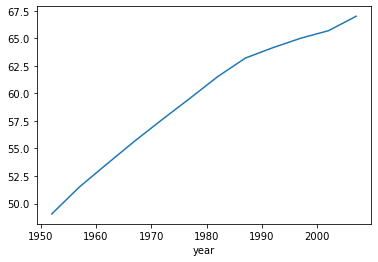

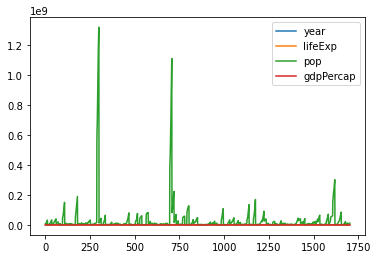

In [57]:
global_yearly_life_expectancy.plot()
# df를 그려보면 수치로 나타낼 수 있는 모든 데이터를 그래프로 그려주는 것을 볼 수 있다.
print(df.info())
df.plot()